# Workshop 3: Linear Regression

## 1. Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [1]:
#pip install matplotlib

### 1.1 Plotting a line: Two Point Method

In [2]:
import matplotlib.pyplot as plt

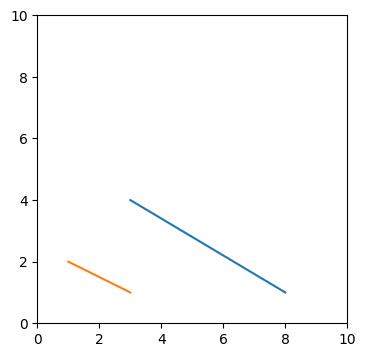

In [3]:
X = [3,8]
Y = [4,1]

#points be  like ((3,4),(8,1))

X_2 = [1,3]
Y_2 = [2,1]

#points be  like ((1,2),(3,1))

plt.figure(figsize=[4,4])
#plt.axis("equal")

plt.xlim(0,10)
plt.ylim(0,10)

plt.plot(X,Y)
plt.plot(X_2,Y_2)

### 1.2 Plotting a line: Slope and Bias Method

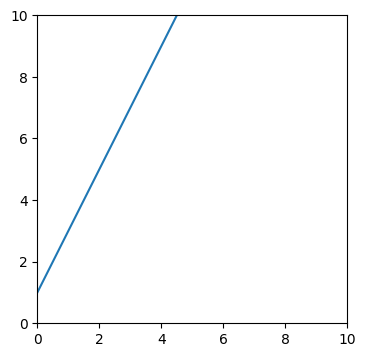

In [4]:
slope = 2
bias = 1

plt.figure(figsize=[4,4])
plt.xlim(0,10)
plt.ylim(0,10)

X_3 = [0,10]
Y_3 = []
for i in X_3:
    Y_3.append(i*slope+bias)

plt.plot(X_3,Y_3)

### 1.3 Scatter Points

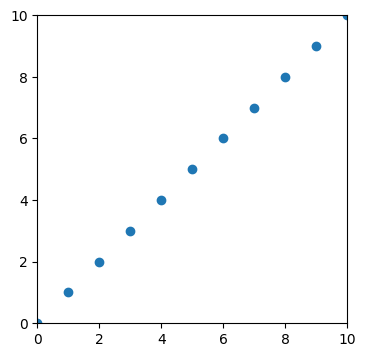

In [5]:
slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,10)
plt.ylim(0,10)

x_1 = [i for i in range(0,11)]
x_2 = []
for i in x_1:
    x_2.append(i*slope+bias)

plt.scatter(x_1,x_2)

## 2. Linear Regression

### 2.1 Show samples in figure

#### Exercise 1. Could you collate the following list into the format of X and y?

In [6]:
Raw_data = [6.1101,  17.5920,
            5.5277,  9.1302,
            8.5186,  13.6620,
            3.2365,  6.4421,
            7.0032,  11.8540,
            5.8598,  6.8233,
            10.9003,  19.7968,
            12.1108, 20.9464,
            2.3355, 4.6102,
            3.4547, 5,
            3.1109, 6.0091,
            3.5789, 7.0903,
            5.2067, 10.9897,
            1.1234, 3.0006,
            1.1518, 3.2035,
            2.2224, 5.0007,
            4.6728, 9.7832,
            3.3398, 7.2893,
            6.1718, 13.1452,
            13.1409, 28.2882,
            11.1112, 23.0405,
            5.1122, 12.3039,
            7.2135, 16.0088]

In [7]:
X_RD = Raw_data[::2]
Y_RD = Raw_data[1::2]

print(f" x = {X_RD} \n y = {Y_RD}")

 x = [6.1101, 5.5277, 8.5186, 3.2365, 7.0032, 5.8598, 10.9003, 12.1108, 2.3355, 3.4547, 3.1109, 3.5789, 5.2067, 1.1234, 1.1518, 2.2224, 4.6728, 3.3398, 6.1718, 13.1409, 11.1112, 5.1122, 7.2135] 
 y = [17.592, 9.1302, 13.662, 6.4421, 11.854, 6.8233, 19.7968, 20.9464, 4.6102, 5, 6.0091, 7.0903, 10.9897, 3.0006, 3.2035, 5.0007, 9.7832, 7.2893, 13.1452, 28.2882, 23.0405, 12.3039, 16.0088]


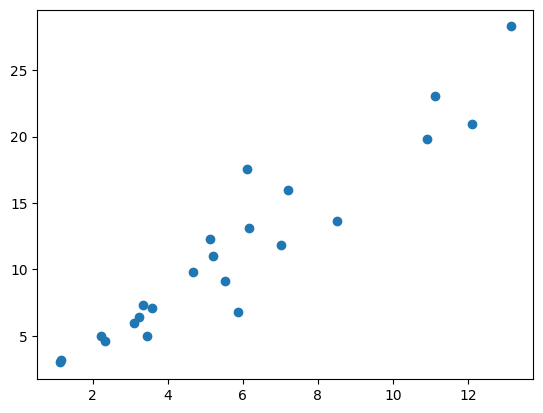

In [8]:
plt.scatter(x = X_RD, y = Y_RD)

#### Exercise 2. Could you plot a line whose slope=1 and bias=0 based on the figure above?

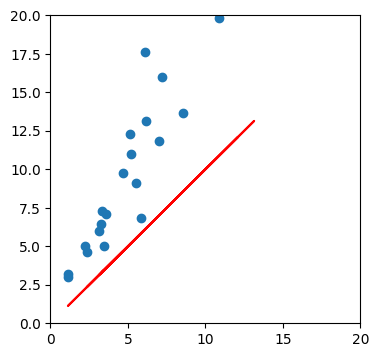

In [9]:
slope = 1
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,20)
plt.ylim(0,20)

y_pred = []
for i in X_RD:
    y_pred.append(i*slope+bias)

plt.scatter(x = X_RD, y = Y_RD) #dots
plt.plot(X_RD,y_pred,c="red") #line

### 2.2 Calculate the loss
Here we will compute the cost function and code that into Python. Cost function is given by
$$
J\left(\theta_0, \theta_1\right)=\frac{1}{2 m} \sum_{i=1}^m\left(h_\theta\left(x_i\right)-y_i\right)^2
$$
Where $h_\theta(x_i) = \theta_1 x_i + \theta_0$

In [10]:
y_sub = []
m = (len(Y_RD))
for i in range(m):
    y_sub.append((y_pred[i] - Y_RD[i])**2)

#loss = ((1/(2*m))*(sum(y_sub)))
loss = sum(y_sub)
print(f"loss = {loss}")
# we usually don't calculate the 1/2m and we only calculate the sigma

loss = 1031.5734920100003


#### 2.2.1 Plot the loss curve when bias is fixed.

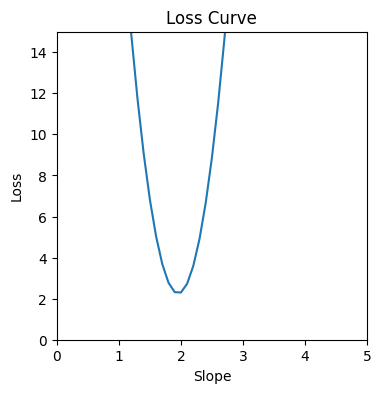

In [11]:
slope_list = [i*0.1 for i in range(0,100)] # 0.1,0.2,0.3,0.4,...
bias = 0

plt.figure(figsize=[4,4])
plt.xlim(0,5)
plt.ylim(0,15)

plt.title("Loss Curve")
plt.xlabel("Slope")
plt.ylabel("Loss")

slope_loss_list=[]
for slope in slope_list:
    y_pred = []
    for i in X_RD:
        y_pred.append(i*slope+bias)

    y_sub = []
    for i in range(len(Y_RD)):
        y_sub.append((y_pred[i] - Y_RD[i])**2)
    slope_loss_list.append(sum(y_sub)/2/len(Y_RD))

plt.plot(slope_list,slope_loss_list)

#### Exercise 3. Could you plot the loss curve when slope is fixed?

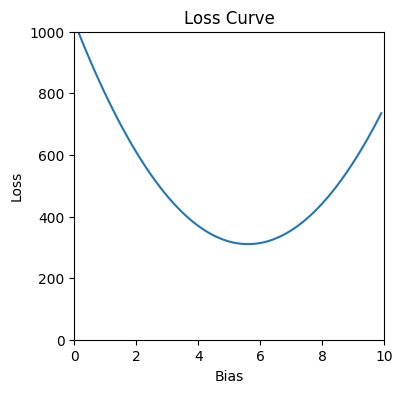

In [12]:
slope = 1
bias_list = [i*0.1 for i in range(100)]

plt.figure(figsize=[4,4])
plt.xlim(0,10)
plt.ylim(0,1000)

plt.title("Loss Curve")
plt.xlabel("Bias")
plt.ylabel("Loss")

bias_loss_list=[]
for bias in bias_list:
    y_pred = []
    for i in X_RD:
        y_pred.append(i*slope+bias)

    y_sub = []
    for i in range(len(Y_RD)):
        y_sub.append((y_pred[i] - Y_RD[i])**2)
    bias_loss_list.append(sum(y_sub))

plt.plot(slope_list,bias_loss_list)

### 2.3 Gradient Descent

$$
\begin{aligned}
\theta_0 &:=\theta_0-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_\theta\left(x_i\right)-y_i\right) x_i^{(0)}\right] \\
\theta_1 &:=\theta_1-\alpha \frac{1}{m} \sum_{i=1}^m\left[\left(h_{\theta}\left(x_i\right)-y_i\right) x_i^{(1)}\right]
\end{aligned}
$$

In [13]:
m = (len(Y_RD))
loss_list = []
slope = 1
bias  = 1
alpha = 0.1

loss_lst = []

for counter in range (m):

  y_sub   = []
  y_sub_1 = []
  y_pred  = []
  for itm in X_RD:
      y_pred.append(itm*slope+bias)
  for i in range(m):
    y_sub.append((y_pred[i] - Y_RD[i]))
    y_sub_1.append((y_pred[i] - Y_RD[i])*(X_RD[i]))

  slope  -= (alpha/(m))*(sum(y_sub))
  bias -=  (alpha/(m))*(sum(y_sub_1))

  #slope  -= (sum(y_sub))
  #bias -=   (sum(y_sub_1))


  loss_lst.append([abs(slope),abs(bias)])

print (loss_lst)
print (min(loss_lst))

[[1.4599847826086956, 4.654569047347826], [1.290094408067675, 4.168997977424817], [1.2664211450162561, 4.715762317849524], [1.2016798173330134, 5.053179361176876], [1.1404127745676806, 5.483665876130028], [1.0713159070837908, 5.9383184414509955], [0.9964735164985922, 6.437958946997371], [0.914689572783261, 6.982199247516099], [0.8254943878960874, 7.576176919708986], [0.7281745122117135, 8.224158611271164], [0.6219999516484954, 8.931121404021516], [0.5061626346929597, 9.702417776883692], [0.37978375482207916, 10.54390596847744], [0.24190385593881797, 11.4619728492732], [0.09147632989338092, 12.463587602116498], [0.07264071615461024, 13.556353373714087], [0.25169308254642087, 14.748565290768342], [0.4470399448004237, 16.049273355277236], [0.6601641684069699, 17.468351159967675], [0.8926835657964552, 19.016570833910325], [1.1463631768986633, 20.705684814075823], [1.4231286674849786, 22.548515057092043], [1.7250809467658124, 24.55905036995871]]
[0.07264071615461024, 13.556353373714087]
